In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# set where alpha = 1
condition = lambda _: _[0]**2 + _[1]**2 < 1

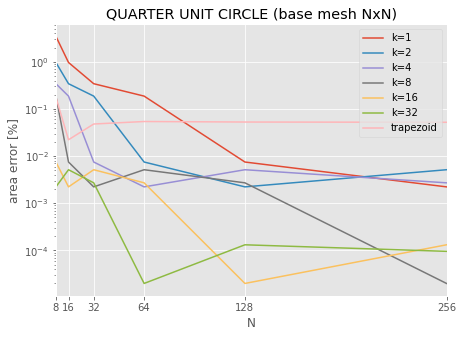

In [6]:
plt.figure(figsize=(7,5))
plt.style.use('ggplot')
l = []
L = []
a = np.pi/4
n=(8,16,32,64,128,256)
for k in [1,2,4,8,16,32]:
        for _ in n:
                sizeX,sizeY = 1,1 # later replace with n, cause map
                nX,nY = _,_
                subX,subY = k,k
                v = []
                for x,y in [(x,y) for x in range(nX*subX) for y in range(nY*subY)]:
                        v.append((sizeX/nX*(x+0.5)/subX,
                                sizeY/nY*(y+0.5)/subY))
                V = []
                for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
                        V.append((sizeX/nX*(x+0.5),
                                sizeY/nY*(y+0.5)))
                condition = lambda _: _[0]**2 + _[1]**2 < 1
                m = np.array([1 if condition(_) else 0 for _ in v]).reshape([nX*subX,nY*subY])
                M = np.array([1 if condition(_) else 0 for _ in V]).reshape([nX,nY])
                M_ = np.zeros_like(M)
                s = 0
                for i,j in [(i,j) for i in range(nX) for j in range(nY)]:
                        x=sum(m[x,y] for x in range(i*subX,(i+1)*subX) for y in range(j*subY,(j+1)*subY)) / (subX*subY)
                        s+=x*(sizeX/nX*sizeY/nY)

                l.append(abs(100*(s-a)/a))
        L.append(l)
        plt.plot(n,l,label=f'k={k}')
        l=[]
L = []
for _ in n:
    sizeX,sizeY = 1,1
    nX,nY = _,_
    V = []
    for x,y in [(x,y) for x in range(nX) for y in range(nY)]:
            V.append((sizeX/nX*(x+0.5),
                    sizeY/nY*(y+0.5)))
    M = []
    div = 200
    dX,dY = sizeX/nX,sizeY/nY
    A = dX*dY
    dX,dY = dX/2,dY/2
    i = 0
    for p in V:
        c = {_:condition(_) for _ in [(p[0]+dX,p[1]+dY),(p[0]+dX,p[1]-dY),(p[0]-dX,p[1]+dY),(p[0]-dX,p[1]-dY)]} 
        if all(_ == list(c.values())[0] for _ in list(c.values())): 
            M.append(1 if list(c.values())[0] else 0)
        else: 
            s = []
            s1 = [(p[0]+dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)] 
            s2 = [(p[0]-dX,_) for _ in np.linspace(p[1]-dY,p[1]+dY,div)]
            s3 = [(_,p[1]+dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
            s4 = [(_,p[1]-dY) for _ in np.linspace(p[0]-dX,p[0]+dX,div)]
            for _ in [s1,s2,s3,s4]:
                for i in range(len(_)-1): 
                    if condition(_[i])!=condition(_[i+1]): s.append(_[i+1]) 
            e = [_ for _ in c.keys() if c.get(_) == True ] 
            if len(e)==3: 
                e = [_ for _ in c.keys() if c.get(_) == False ] 
            if len(e)==1: 
                'abs needed?'
                x = abs(abs(e[0][0]-s[0][0])-abs(e[0][0]-s[1][0]))
                y = abs(abs(e[0][1]-s[0][1])-abs(e[0][1]-s[1][1]))
                M.append(a := 0.5*x*y/A if condition(e[0]) else 1-0.5*x*y/A) 
            if len(e)==2: 
                h = [min([((_[0]-s[0][0])**2+(_[1]-s[0][1])**2)**0.5,
                        ((_[0]-s[1][0])**2+(_[1]-s[1][1])**2)**0.5]) for _ in e]
                if abs(e[0][0]-e[1][0]) > abs(e[0][1]-e[1][1]): d = dX*2
                else: d = dY*2
                M.append((0.5*d*(h[0]+h[1]))/A)
    L.append(abs(100*(sum([_*(sizeX/nX*sizeY/nY) for _ in M])-0.785)/0.785))
plt.plot(n,L,label='trapezoid')
plt.axhline(0,color='k')
plt.legend()
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('area error [%]')
plt.xlim(n[0],n[-1])
plt.xticks(n)
plt.title('QUARTER UNIT CIRCLE (base mesh NxN)')
plt.savefig('error',dpi=600,facecolor='white')